<a href="https://colab.research.google.com/github/SwarnaUmasankar/NN/blob/main/Mod2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
##import dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [ ]:
print(f"Training images shape:{x_train.shape}")
print(f"Training labels shape:{y_train.shape}")
print(f"Test images shape:{x_test.shape}")
print(f"Test labels shape:{y_test.shape}")

Training images shape:(50000, 32, 32, 3)
Training labels shape:(50000, 1)
Test images shape:(10000, 32, 32, 3)
Test labels shape:(10000, 1)


In [ ]:
NUM_CLASSES=10
classes=[
         'airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck'
]

In [ ]:
plt.style.use('dark_background')

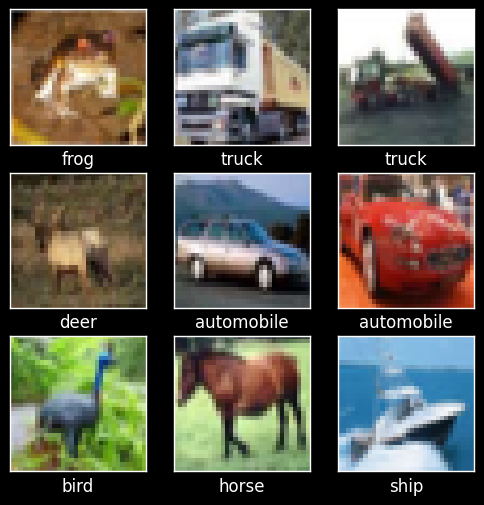

In [ ]:
## visualize
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
plt.show();

In [ ]:
##normalize img
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
##check img
x_train[0].dtype,x_train[0].max(),x_train[0].min

(dtype('float32'), 1.0, <function ndarray.min>)

In [ ]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

BUILD THE MODEL


In [ ]:
model=Sequential()

In [ ]:
## add conv layer
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu',
    input_shape=(32, 32, 3)
))

model.add(
    MaxPool2D(
        pool_size=(2, 2),
        padding='same',
        )
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
##add 2nd conv layer
model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))

##another pooling layer
model.add(MaxPool2D(2, 2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
##add 3rd conv layer
model.add(Conv2D(64,(3, 3),activation='relu',padding='same'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
Total params: 28640 (111.88 KB)
Trainable params: 28640 

add bottom part of model


In [ ]:
#flatten the o/p
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
model.layers

In [ ]:
model.layers[-1].output.shape

TensorShape([None, 4096])

In [ ]:
##add dense layer
model.add(Dense(256, activation='relu'))

##output layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
optimizer=Adam(learning_rate=0.01)

In [ ]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Training the model

In [ ]:
NUM_EPOCHS=50
BATCH_SIZE=128

In [ ]:
history=model.fit(
    x_train,
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test,y_test)
)

Epoch 1/50
391/391 [==============================] - 71s 177ms/step - loss: 1.8403 - accuracy: 0.3336 - val_loss: 1.5965 - val_accuracy: 0.4209
Epoch 2/50
391/391 [==============================] - 67s 170ms/step - loss: 1.5070 - accuracy: 0.4557 - val_loss: 1.4535 - val_accuracy: 0.4769
Epoch 3/50
391/391 [==============================] - 67s 173ms/step - loss: 1.4036 - accuracy: 0.4952 - val_loss: 1.4339 - val_accuracy: 0.4867
Epoch 4/50
391/391 [==============================] - 67s 171ms/step - loss: 1.3425 - accuracy: 0.5171 - val_loss: 1.3378 - val_accuracy: 0.5222
Epoch 5/50
391/391 [==============================] - 68s 173ms/step - loss: 1.2946 - accuracy: 0.5348 - val_loss: 1.3363 - val_accuracy: 0.5285
Epoch 6/50
391/391 [==============================] - 66s 170ms/step - loss: 1.2592 - accuracy: 0.5487 - val_loss: 1.4437 - val_accuracy: 0.4948
Epoch 7/50
391/391 [==============================] - 67s 172ms/step - loss: 1.2189 - accuracy: 0.5665 - val_loss: 1.3895 - val_ac